In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import RegexpTokenizer
from matplotlib import pyplot as plt
from sklearn.decomposition import LatentDirichletAllocation
import numpy as np

In [ ]:
df = pd.read_csv("/content/cleaned_text.csv")
df_LDA = df['Text'] 

In [ ]:
# Initialize regex tokenizer
tokenizer = RegexpTokenizer(r'\w+')

In [ ]:
#Vectorize document using TF-IDF
tf_idf_vect = TfidfVectorizer(lowercase=True,
                        stop_words='english',
                        tokenizer = tokenizer.tokenize)

In [ ]:
# Fit and Transfrom Text Data
df_LDA_tf = tf_idf_vect.fit_transform(df_LDA)
a = pd.DataFrame(df_LDA_tf.toarray(), columns=tf_idf_vect.get_feature_names_out())

/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [ ]:
a

,abandoned,ability,able,abrahamic,absolute,absurdist,abused,academy,accelerometer,accessing,...,yesterday,york,younger,youth,youtube,zammit,zealand,zimbabwe,zone,zuckerberg
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
396,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
397,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
398,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#Get the vocabulary 
vocab = tf_idf_vect.get_feature_names_out()

In [ ]:
#Create the LDA Model
lda_model = LatentDirichletAllocation(n_components= 4, learning_method = "online", max_iter=100, random_state =2 )
X_topics = lda_model.fit_transform(df_LDA_tf)

In [ ]:
#Get topic words
topic_words = lda_model.components_

In [ ]:
!pip install pyLDAvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


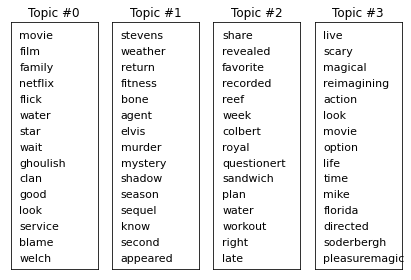

In [ ]:
NUM_TOPICS= 4
word_topic = np.array(lda_model.components_)
#print(word_topic)
word_topic = word_topic.transpose()

num_top_words = 15
vocab_array = np.asarray(vocab)

#fontsize_base = 70 / np.max(word_topic) # font size for word with largest share in corpus
fontsize_base = 14

for t in range(NUM_TOPICS):
    plt.subplot(1, NUM_TOPICS, t + 1)  # plot numbering starts with 1
    plt.ylim(0, num_top_words + 0.5)  # stretch the y-axis to accommodate the words
    plt.xticks([])  # remove x-axis markings ('ticks')
    plt.yticks([]) # remove y-axis markings ('ticks')
    plt.title('Topic #{}'.format(t))
    top_words_idx = np.argsort(word_topic[:,t])[::-1]  # descending order
    top_words_idx = top_words_idx[:num_top_words]
    top_words = vocab_array[top_words_idx]
    top_words_shares = word_topic[top_words_idx, t]
    for i, (word, share) in enumerate(zip(top_words, top_words_shares)):
        plt.text(0.1, num_top_words-i-0.5, word, fontsize=11)
                 ##fontsize_base*share)

plt.tight_layout()
plt.show()

In [ ]:
import warnings
#warnings.filterwarnings("ignore", category=DeprecationWarning)
import pyLDAvis.sklearn as LDAvis
import pyLDAvis

# ## conda install -c conda-forge pyldavis
pyLDAvis.enable_notebook() ## not using notebook

panel = LDAvis.prepare(lda_model, df_LDA_tf,tf_idf_vect)
pyLDAvis.save_html(panel, "InTheNews.html")

#ARM IN R

In [ ]:
library(readr)
library(tidyverse)
library(tidytext)
library(dplyr)

library(viridis)
library(arules)
library(TSP)
library(data.table)
library(tcltk)
library(dplyr)
library(devtools)
library(purrr)
library(tidyr)
library(arulesViz)
library(RColorBrewer)
df <- read_csv("cleanaitweetsnolabnostopwords.csv")

df <- df %>% select(-"...1")
df_nostop <- as.data.frame(df$no_stopwords)
df_nostop
write_csv(df_nostop, "tweetstransnostop.csv",col_names = FALSE)
tweets_trans <- read.transactions("tweetstransnostop.csv")


arules::itemFrequencyPlot(tweets_trans, topN = 20, 
                          col = brewer.pal(8, 'Pastel2'),
                          main = 'Relative Item Frequency Plot',
                          type = "relative",
                          ylab = "Item Frequency (Relative)")
                                  
inspect(tweets_trans)
Trules = arules::apriori(tweets_trans, parameter = list(support=0.02,
                                                        confidence=0.02,
                                                        minlen=2))
inspect(Trules)

subrules_supp <- head(sort(Trules, by = "support"),15)
inspect(subrules_supp)

plot(subrules_supp,method="graph",engine="htmlwidget")

subrules_conf <- head(sort(Trules,by="confidence"),15)
inspect(subrules_conf)

plot(subrules_conf,method="graph",engine="htmlwidget")

subrules_lift <- head(sort(Trules,by="lift"),15)
inspect(subrules_lift)

plot(subrules_lift,method="graph",engine="htmlwidget")